In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_roc_curve



Обучить линейный SVM для задачи бинарной классификацииluminal A vs luminal B на 50 генах. Отобрать 5 наиболее важныхгенов (наибольшие модули коэффициентов), обучить на них SVM.Как изменится качество классификации (TPR, TNR, ROC AUC)?

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar15/BRCA_pam50.tsv', index_col = 0, sep = '\t')
df = df.loc[(df['Subtype'] == 'Luminal A') | (df['Subtype'] == 'Luminal B')] #оставляем только нужные типы 
df

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A
TCGA-A1-A0SG-01A,2.948244,2.298689,1.116282,1.552142,3.582144,2.886328,2.697313,1.968233,1.662241,1.280947,...,1.814486,6.284076,4.622443,6.845350,3.381032,3.586285,2.845107,3.359571,5.786065,Luminal A
TCGA-A1-A0SH-01A,3.097068,2.659636,0.762293,1.326867,3.256827,2.353642,2.396729,2.103346,1.477519,1.173324,...,3.020659,6.237971,5.467481,6.715036,5.146230,4.216788,2.829156,2.732181,6.553140,Luminal A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-GM-A2DL-01A,4.279134,3.879382,2.518115,1.460530,4.977908,3.594853,4.385759,3.567513,3.161674,1.688465,...,3.005505,6.540118,5.935218,8.588987,3.979697,1.891074,1.991623,2.532752,4.186391,Luminal A
TCGA-GM-A2DM-01A,2.238649,1.804489,0.741287,1.041073,2.985514,1.839953,1.190147,1.380188,1.131089,0.952764,...,1.633269,7.083743,5.864256,2.892541,3.150784,0.017051,3.092225,2.646148,4.517829,Luminal A
TCGA-GM-A2DN-01A,4.172296,3.371600,2.965499,2.474122,3.908066,3.763788,3.240319,2.608317,2.470973,2.372499,...,4.685897,6.203535,4.365116,3.841470,3.653086,0.720639,2.811856,1.028073,4.976873,Luminal A
TCGA-GM-A2DO-01A,3.755078,4.027775,2.623690,2.253348,4.228186,3.913628,3.822350,2.746687,2.541812,2.905382,...,4.579657,4.756974,5.265363,4.559312,2.579594,0.848374,2.902589,1.118081,4.262969,Luminal B


In [3]:
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=13)
model = SVC(kernel="linear") #линейное ядро
model.fit(X_train, y_train) #тренировка
y_pred = model.predict(X_test) #проверка тестовой выборки
print(accuracy_score(y_test, y_pred))

0.9463087248322147


In [6]:
#задаем матрицу ошибок  и расчитываем чувствительность и специфичность
M = confusion_matrix(y_test, y_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

[[99  4]
 [ 4 42]]
0.9611650485436893 0.9130434782608695


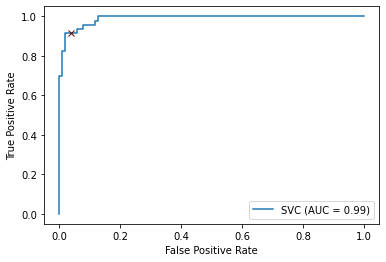

In [9]:
#строим рок-кривую
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="#640a00")
plt.show()

In [12]:
a = df.iloc[:,:-1].T #берем все кроме подтипов и транспонируем чтобы вычленить для генов построчно
w = model.coef_[0] #веса
a['coef'] = np.abs(w)
genes = a.sort_values(['coef'], ascending=False)
genes.head()

,TCGA-A1-A0SD-01A,TCGA-A1-A0SE-01A,TCGA-A1-A0SF-01A,TCGA-A1-A0SG-01A,TCGA-A1-A0SH-01A,TCGA-A1-A0SI-01A,TCGA-A1-A0SJ-01A,TCGA-A1-A0SM-01A,TCGA-A1-A0SN-01A,TCGA-A1-A0SQ-01A,...,TCGA-GM-A2DA-01A,TCGA-GM-A2DC-01A,TCGA-GM-A2DI-01A,TCGA-GM-A2DK-01A,TCGA-GM-A2DL-01A,TCGA-GM-A2DM-01A,TCGA-GM-A2DN-01A,TCGA-GM-A2DO-01A,TCGA-GM-A3NY-01A,coef
FOXC1,2.121368,2.446462,1.442343,1.022343,1.911016,1.320504,1.964345,1.442332,1.488322,1.092803,...,1.854285,0.512058,1.573270,2.395360,1.869704,1.681717,1.505424,1.420852,1.357161,1.519142
MIA,1.071270,1.512452,1.491989,0.279909,1.101641,0.185979,0.940423,0.261704,0.306098,0.186064,...,0.449574,0.154700,0.690220,0.669039,0.094162,0.041735,1.624317,0.219939,0.832100,1.301628
ORC6,0.623979,0.596904,0.519807,1.697595,0.614142,1.097762,1.644073,0.836916,1.009118,1.337683,...,1.103704,0.542722,0.538102,1.594072,1.875251,0.409954,0.760590,1.486685,0.655157,1.114742
KRT17,7.046602,5.348230,5.934156,4.321309,5.725153,4.666349,6.353329,3.959304,3.941203,3.713975,...,5.383806,1.787940,6.365076,5.786963,1.432236,2.572469,7.604874,2.214063,4.829615,1.065207
UBE2T,3.016158,4.626989,3.417782,2.948244,3.097068,4.986392,4.605658,4.440626,4.089472,4.199997,...,4.068025,2.827419,2.560523,3.770999,4.279134,2.238649,4.172296,3.755078,4.448225,0.773348


In [13]:
df1 = df[['KRT17', 'ACTR3B', 'MIA', 'BIRC5', 'BAG1', 'Subtype']]
df1

,KRT17,ACTR3B,MIA,BIRC5,BAG1,Subtype
TCGA-A1-A0SD-01A,7.046602,1.279642,1.071270,2.514871,5.755496,Luminal A
TCGA-A1-A0SE-01A,5.348230,1.432979,1.512452,3.289047,3.916893,Luminal A
TCGA-A1-A0SF-01A,5.934156,1.593008,1.491989,2.262844,3.511197,Luminal A
TCGA-A1-A0SG-01A,4.321309,1.094619,0.279909,2.298689,4.391188,Luminal A
TCGA-A1-A0SH-01A,5.725153,1.074402,1.101641,2.659636,3.754268,Luminal A
...,...,...,...,...,...,...
TCGA-GM-A2DL-01A,1.432236,1.487001,0.094162,3.879382,4.096110,Luminal A
TCGA-GM-A2DM-01A,2.572469,1.570265,0.041735,1.804489,6.304285,Luminal A
TCGA-GM-A2DN-01A,7.604874,1.220237,1.624317,3.371600,3.670876,Luminal A
TCGA-GM-A2DO-01A,2.214063,0.932850,0.219939,4.027775,3.740756,Luminal B


In [14]:
X = df.iloc[:, :-1].to_numpy()
y = df["Subtype"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.9194630872483222


In [16]:
M = confusion_matrix(y_test, y_pred)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(M, TPR, TNR)

[[97  6]
 [ 6 40]] 0.941747572815534 0.8695652173913043


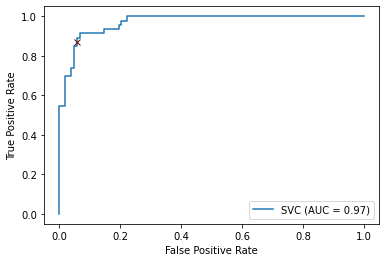

In [17]:
plot_roc_curve(model, X_test, y_test)
plt.plot(1 - TPR, TNR, "x", c="#640a00")
plt.show()

чуть хуже но прям сильно ничего не поменялось

Обучить линейный SVM для многоклассовой задачи (BRCApam50), используя
1 50 генов;
2 первые 2 главные компоненты.
Сравнить качество классификации.

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/s-a-nersisyan/HSE_bioinformatics_2021/master/seminar15/BRCA_pam50.tsv', index_col = 0, sep = '\t')
df

,UBE2T,BIRC5,NUF2,CDC6,CCNB1,TYMS,MYBL2,CEP55,MELK,NDC80,...,NAT1,FOXA1,BLVRA,MMP11,GPR160,FGFR4,GRB7,TMEM45B,ERBB2,Subtype
TCGA-A1-A0SB-01A,2.507502,2.172270,0.952906,1.683162,3.108067,3.332448,2.982268,1.613604,1.641565,1.218495,...,0.926850,2.869065,3.896839,1.387963,1.141875,0.544443,2.942855,0.875017,5.014075,Normal-like
TCGA-A1-A0SD-01A,3.016158,2.514871,1.509129,1.354016,3.685035,2.125453,3.047474,2.333704,1.996853,1.171520,...,4.905805,6.677118,5.044878,5.631087,3.942169,3.404177,3.655783,2.757977,5.999041,Luminal A
TCGA-A1-A0SE-01A,4.626989,3.289047,2.102190,2.116975,4.525954,2.906470,3.798966,2.745027,2.451070,2.070499,...,6.053451,6.690114,5.843557,5.504526,3.881691,1.038253,3.156081,1.355837,5.585759,Luminal A
TCGA-A1-A0SF-01A,3.417782,2.262844,1.569301,1.800667,3.823694,2.843952,3.807282,2.141323,2.082400,1.693568,...,6.883599,6.280921,5.705410,3.511572,4.374803,2.299735,3.054917,1.315680,5.215699,Luminal A
TCGA-A1-A0SG-01A,2.948244,2.298689,1.116282,1.552142,3.582144,2.886328,2.697313,1.968233,1.662241,1.280947,...,1.814486,6.284076,4.622443,6.845350,3.381032,3.586285,2.845107,3.359571,5.786065,Luminal A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-BH-A0BV-11A,1.870352,1.072286,0.608802,0.902198,2.587268,2.266861,1.450288,0.952375,0.914605,0.726684,...,2.266702,4.919079,4.153488,0.861931,2.403286,0.401022,4.044734,1.569947,4.871977,Healthy
TCGA-BH-A0BC-11A,1.739019,1.219743,0.573760,0.935661,1.957932,2.211228,1.837159,1.142789,0.948133,0.433871,...,1.798099,4.237113,4.438927,0.786682,1.765614,0.761287,3.296281,1.124510,4.406197,Healthy
TCGA-BH-A0DD-11A,1.464052,0.597237,0.340499,1.037614,1.665574,1.312091,1.086920,0.623715,0.544445,0.429620,...,2.147100,1.172748,5.040978,0.415481,1.626146,0.113552,0.794801,0.177137,3.166627,Healthy
TCGA-BH-A0DH-11A,1.686862,1.206100,0.259961,0.704237,2.288728,1.789974,1.095518,0.541392,0.526630,0.471734,...,2.361668,4.795254,5.046676,1.342472,1.866943,0.619597,2.776416,1.925006,4.462839,Healthy


In [19]:
from sklearn.decomposition import PCA

In [20]:
X = df.iloc[:, :-1].to_numpy()
y = df.loc[:,"Subtype"].to_numpy()

comp = PCA(n_components=2)
X1 = comp.fit_transform(X)

X1_train, X1_test, y_train, y_test = train_test_split(X1, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X1_train, y_train)
y_pred = model.predict(X1_test)

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)
print(M)

The accuracy score is 0.8253275109170306
The balanced accuracy score is 0.6794233522873059
[[ 8  0  0  8  0  0]
 [ 0 20  4  0  1  0]
 [ 1  0 96  6  0  0]
 [ 1  0 14 31  0  0]
 [ 1  0  3  0  1  0]
 [ 1  0  0  0  0 33]]


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=17)
model = SVC(kernel="linear")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('The accuracy score is', accuracy_score(y_test, y_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y_test, y_pred))

M = confusion_matrix(y_test, y_pred)
print(M)

The accuracy score is 0.9126637554585153
The balanced accuracy score is 0.7822173561277613
[[15  0  0  1  0  0]
 [ 0 25  0  0  0  0]
 [ 0  0 98  5  0  0]
 [ 0  0  9 37  0  0]
 [ 0  1  3  0  0  1]
 [ 0  0  0  0  0 34]]


в точности достаточно сильно проигрывает расчет по 2 главным компонентам, 

Сгенерировать два датасета:
    1 Две выборки из двумерного нормального распределения с центрами в (0, 0) и (10, 10) по 10000 точек (ожидается идеальная линейная разделимость);
    2 две выборки из двумерного нормального распределения с центрами в (0, 0) и (0, 0) по 10000 точек (ожидается полное отсутствие разделимости).
Обучить линейный SVM в обоих случаях. 
Зависит ли скоростьобучения SVM от качества результирующего классификатора?

In [27]:
from time import time

In [28]:
n = 10000
X1_1 = np.random.normal(loc = 0, size = (n, 2)) #из двумерного нормального распределения
X2_1 = np.random.normal(loc = 10, size = (n, 2))
X3_1 = np.random.normal(loc = 0, size = (n, 2))
X4_1 = np.random.normal(loc = 0, size = (n, 2))
X1 = np.vstack([X1_1, X2_1])
y1 = np.array([0]*n + [1]*n)
X2 = np.vstack([X3_1, X4_1])
y2 = np.array([0]*n + [1]*n)

time =  -0.006995439529418945
The accuracy score is 1.0
The balanced accuracy score is 1.0
[[2500    0]
 [   0 2500]]
1.0 1.0


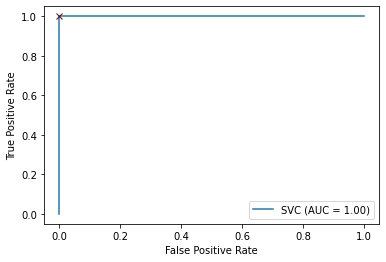

In [30]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, stratify=y1, random_state=17)
model = SVC(kernel = "linear")
start = time()
model.fit(X1_train, y1_train)
end = time()
y1_pred = model.predict(X1_test)

print("time = ", start - end)

print('The accuracy score is', accuracy_score(y1_test, y1_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y1_test, y1_pred))

M = confusion_matrix(y1_test, y1_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X1_test, y1_test)
plt.plot(1 - TPR, TNR, "x", c="#640a00")

time =  -3.9897172451019287
The accuracy score is 0.5004
The balanced accuracy score is 0.5004000000000001
[[1233 1267]
 [1231 1269]]
0.4932 0.5076


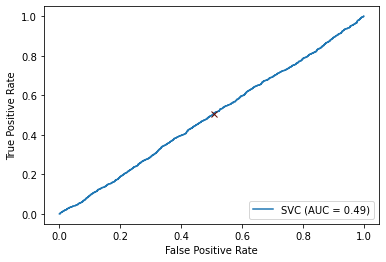

In [31]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, stratify = y2, random_state=17)
model = SVC(kernel = "linear")
start = time()
model.fit(X2_train, y2_train)
end = time()
y2_pred = model.predict(X2_test)

print("time = ", start - end)

print('The accuracy score is', accuracy_score(y2_test, y2_pred))
print('The balanced accuracy score is', balanced_accuracy_score(y2_test, y2_pred))

M = confusion_matrix(y2_test, y2_pred)
print(M)
TPR = M[0, 0] / (M[0, 0] + M[0, 1])
TNR = M[1, 1] / (M[1, 0] + M[1, 1])
print(TPR, TNR)

plot_roc_curve(model, X2_test, y2_test)
plt.plot(1 - TPR, TNR, "x", c="#640a00")